## Background
Research suggests that speech production is a complex dynamical system, and that Parkinson's-related impairments to the vocal organs, muscles and nerves will affect the dynamics of the whole system, suggesting nonlinear measures may benefit the prediction of Parkinson's impairment from voice recordings. 

## Features
#### Traditional measures:
  * **age**
  * **sex**
  * **shimmer** - extent of variation in amplitude from vocal cycle to vocal cycle
  * **noise-to-harmonics ratio (NHR)** -  amplitude of noise relative to tonal components of speech signal
  * **jitter** - measures pitch variation, such as vibrato and microtremor; calculated as differences in absolute frequencies of each cycle, averaged over a number of cycles
      - *Note*: Natural pitch variation exists in healthy individuals, but may be perturbed in those with vocal impairments secondary to Parkinson's. 
  
#### Complex dynamical systems-based measures:

  * **correlation dimension** - used to recreate all possible states (phase space) of the system that generates speech  
  * **recurrence period density entropy (RPDE)** - this entropy measures the periodicity of the system
      - *Note*: When the voice signal deviates from its trajectory of recurring to the same point in the phase space, this may indicate a voice disorder, as many cause impairment of sustained regular vocal fold vibration.  
    
  * **detrended fluctuation analysis (DFA)** - extent of stochastic self-similarity of noise in the speech signal
      - *Note*: Air blowing over vocal folds is a major cause of noise in speech, the pattern of which may be disrupted in some voice disorders. This noise can be characterized by a scaling exponent, which is higher in those with vocal disorders.  
      
  * **pitch period entropy (PPE)** - another measure of pitch variation
      - *Note*: Humans perceive pitch on a logarithmic scale. PPE is calculated by converting a pitch sequence to the logarithmic semitone scale. In addition to rescaling, PPE seeks to filter out natural (smooth) pitch variation in favor of rough variation sequences. After constructing a probability distribution of voice variations, entropy is calculated, characterizing the extent of variation beyond natural fluctuations in pitch. 
      
## Target

We are predicting total scores on the Unified Parkinson's disease rating scale (UPDRS), the most common scale used to study and quantify the long-term course of the disease. 

## Setting Up

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 25)
%matplotlib inline

In [3]:
f = open("parkinsons_updrs.data", "r")
df = pd.read_csv(f)

## Getting Acquainted

In [4]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

In [6]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Test time is time since recruitment into the trial, so we'll remove all observations with negative test times:

In [42]:
 df = df[df.test_time > 0]

Let's look again, now that those erroneous observations are removed:

In [8]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,21.460345,64.814771,0.318438,93.061538,21.289655,29.014090,0.006156,0.000044,0.002988,0.003278,0.008965,0.034038,0.311012,0.017157,0.020149,0.027489,0.051470,0.032126,21.679527,0.541423,0.653252,0.219618
std,12.361029,8.827750,0.465910,53.320896,8.133419,10.709966,0.005628,0.000036,0.003126,0.003734,0.009378,0.025836,0.230310,0.013237,0.016672,0.020002,0.039710,0.059735,4.292521,0.101024,0.070955,0.091494
min,1.000000,36.000000,0.000000,0.395830,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,47.335500,15.000000,21.362000,0.003580,0.000022,0.001580,0.001825,0.004730,0.019110,0.175000,0.009280,0.010790,0.015660,0.027830,0.010953,19.404000,0.469695,0.596100,0.156385
50%,22.000000,65.000000,0.000000,91.754000,20.871000,27.522000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027530,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.917000,0.542250,0.643550,0.205560
75%,33.000000,72.000000,1.000000,138.460000,27.594000,36.400500,0.006800,0.000053,0.003290,0.003470,0.009880,0.039775,0.365000,0.020605,0.023775,0.032725,0.061805,0.031464,24.445500,0.614045,0.711480,0.264590
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


## Data Exploration

In [9]:
corr = df.corr()

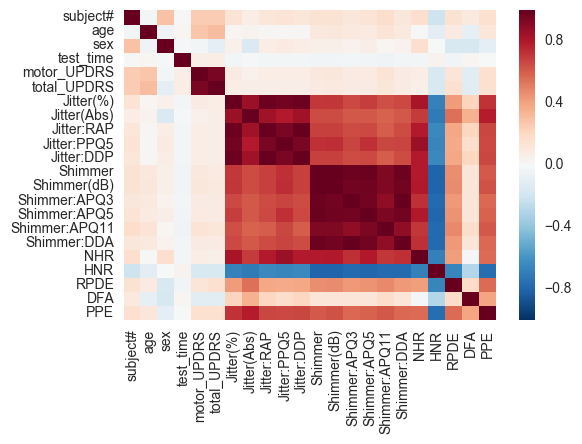

In [10]:
sns.heatmap(corr)

[<matplotlib.text.Text at 0x113ae4d90>, <matplotlib.text.Text at 0x113aea590>]

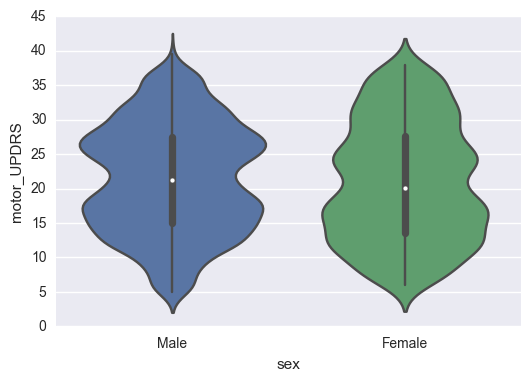

In [35]:
ax = sns.violinplot(x="sex", y="motor_UPDRS", data=df)
ax.set_xticklabels(['Male', 'Female'])

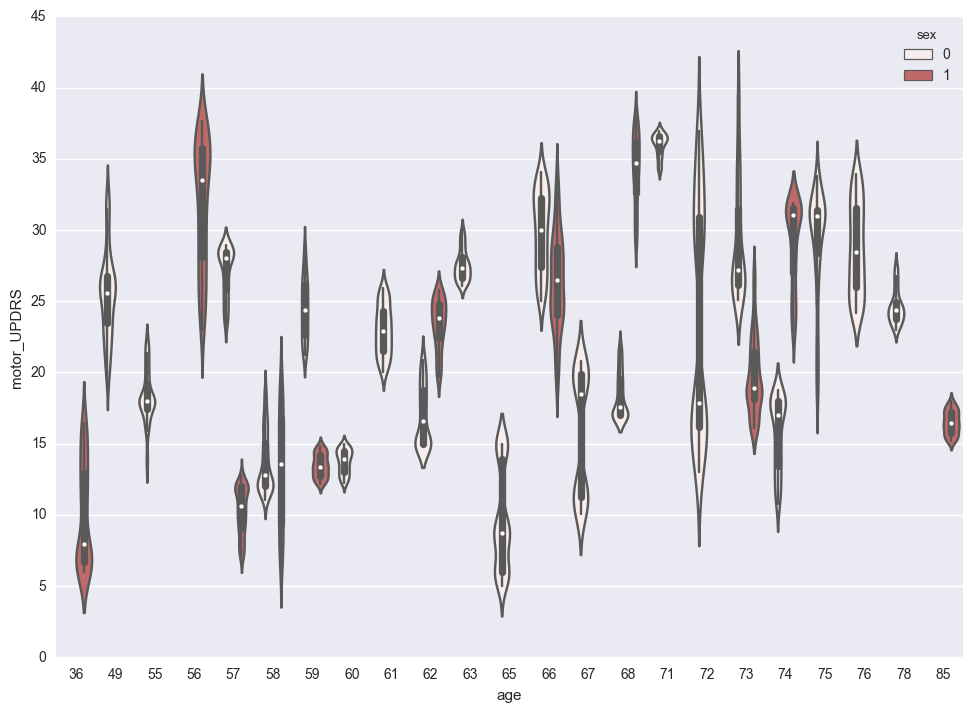

In [28]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax = sns.violinplot(x="age", y="motor_UPDRS", hue="sex", color='#CD5C5C', data=df)

[<matplotlib.text.Text at 0x1339ee590>, <matplotlib.text.Text at 0x133aad190>]

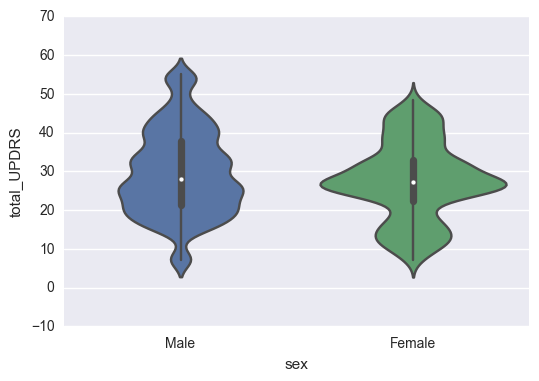

In [36]:
ax = sns.violinplot(x="sex", y="total_UPDRS", data=df)
ax.set_xticklabels(['Male', 'Female'])

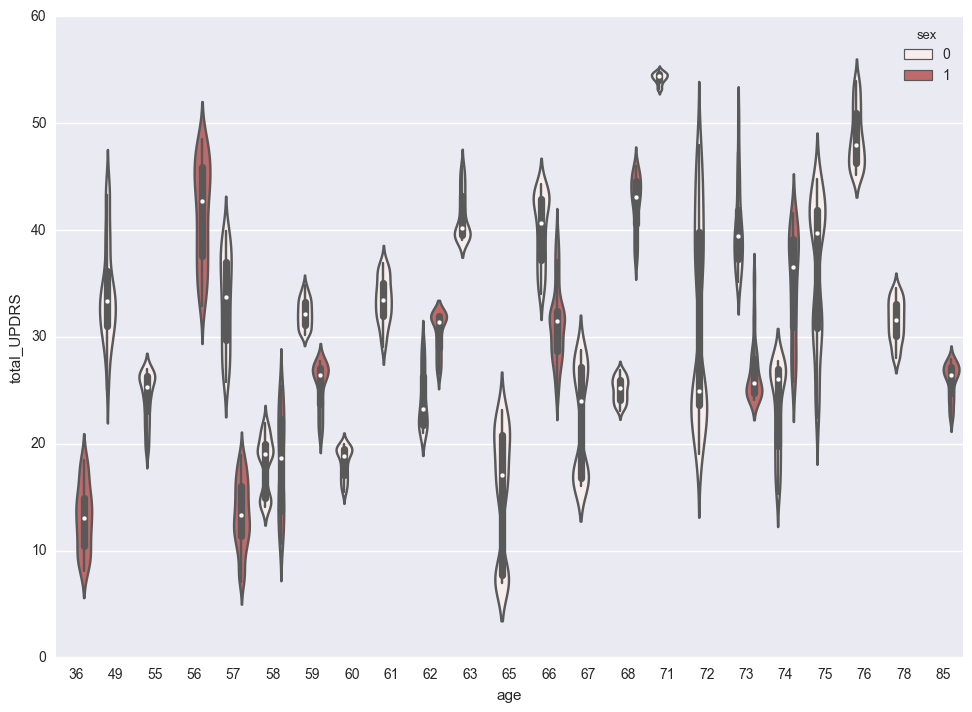

In [33]:
fig2, ax2 = plt.subplots()
# the size of A4 paper
fig2.set_size_inches(11.7, 8.27)
ax2 = sns.violinplot(x="age", y="total_UPDRS", hue="sex", color='#CD5C5C', data=df)

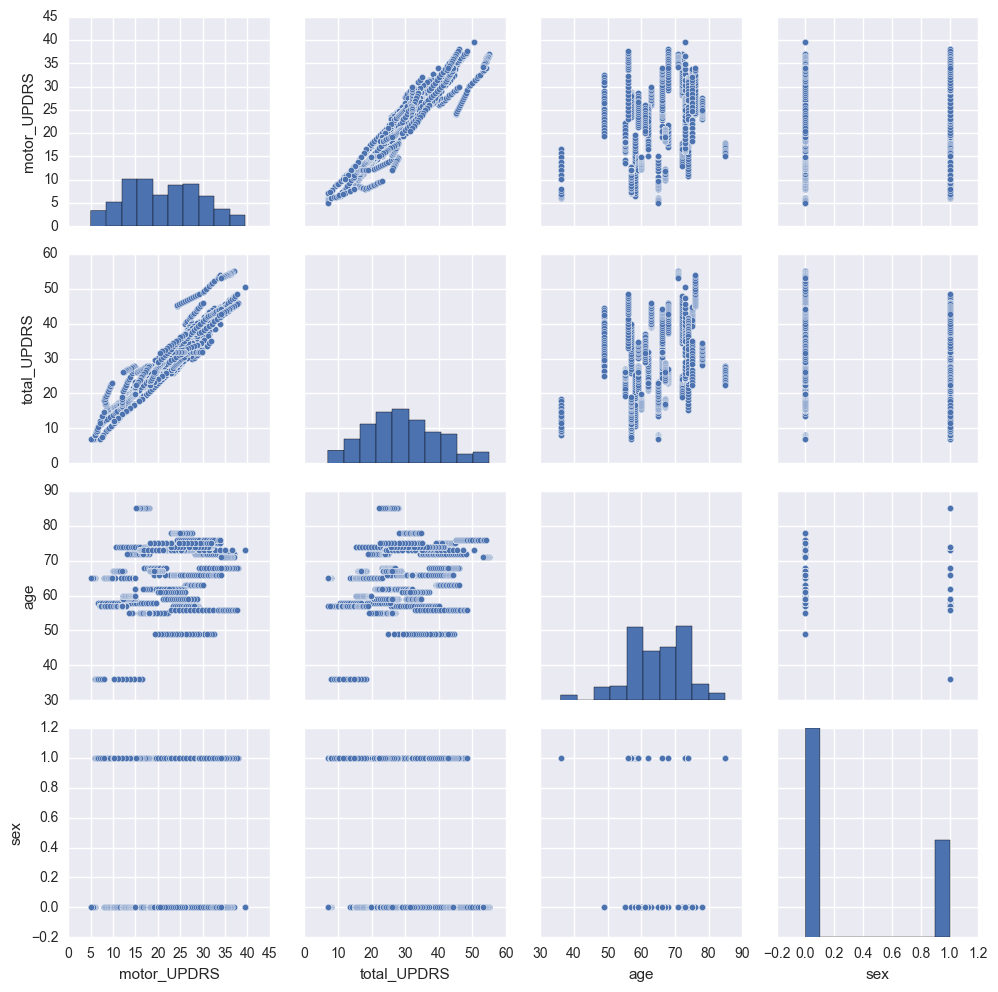

In [15]:
sns.pairplot(df, vars=["motor_UPDRS", "total_UPDRS", "age", "sex"])

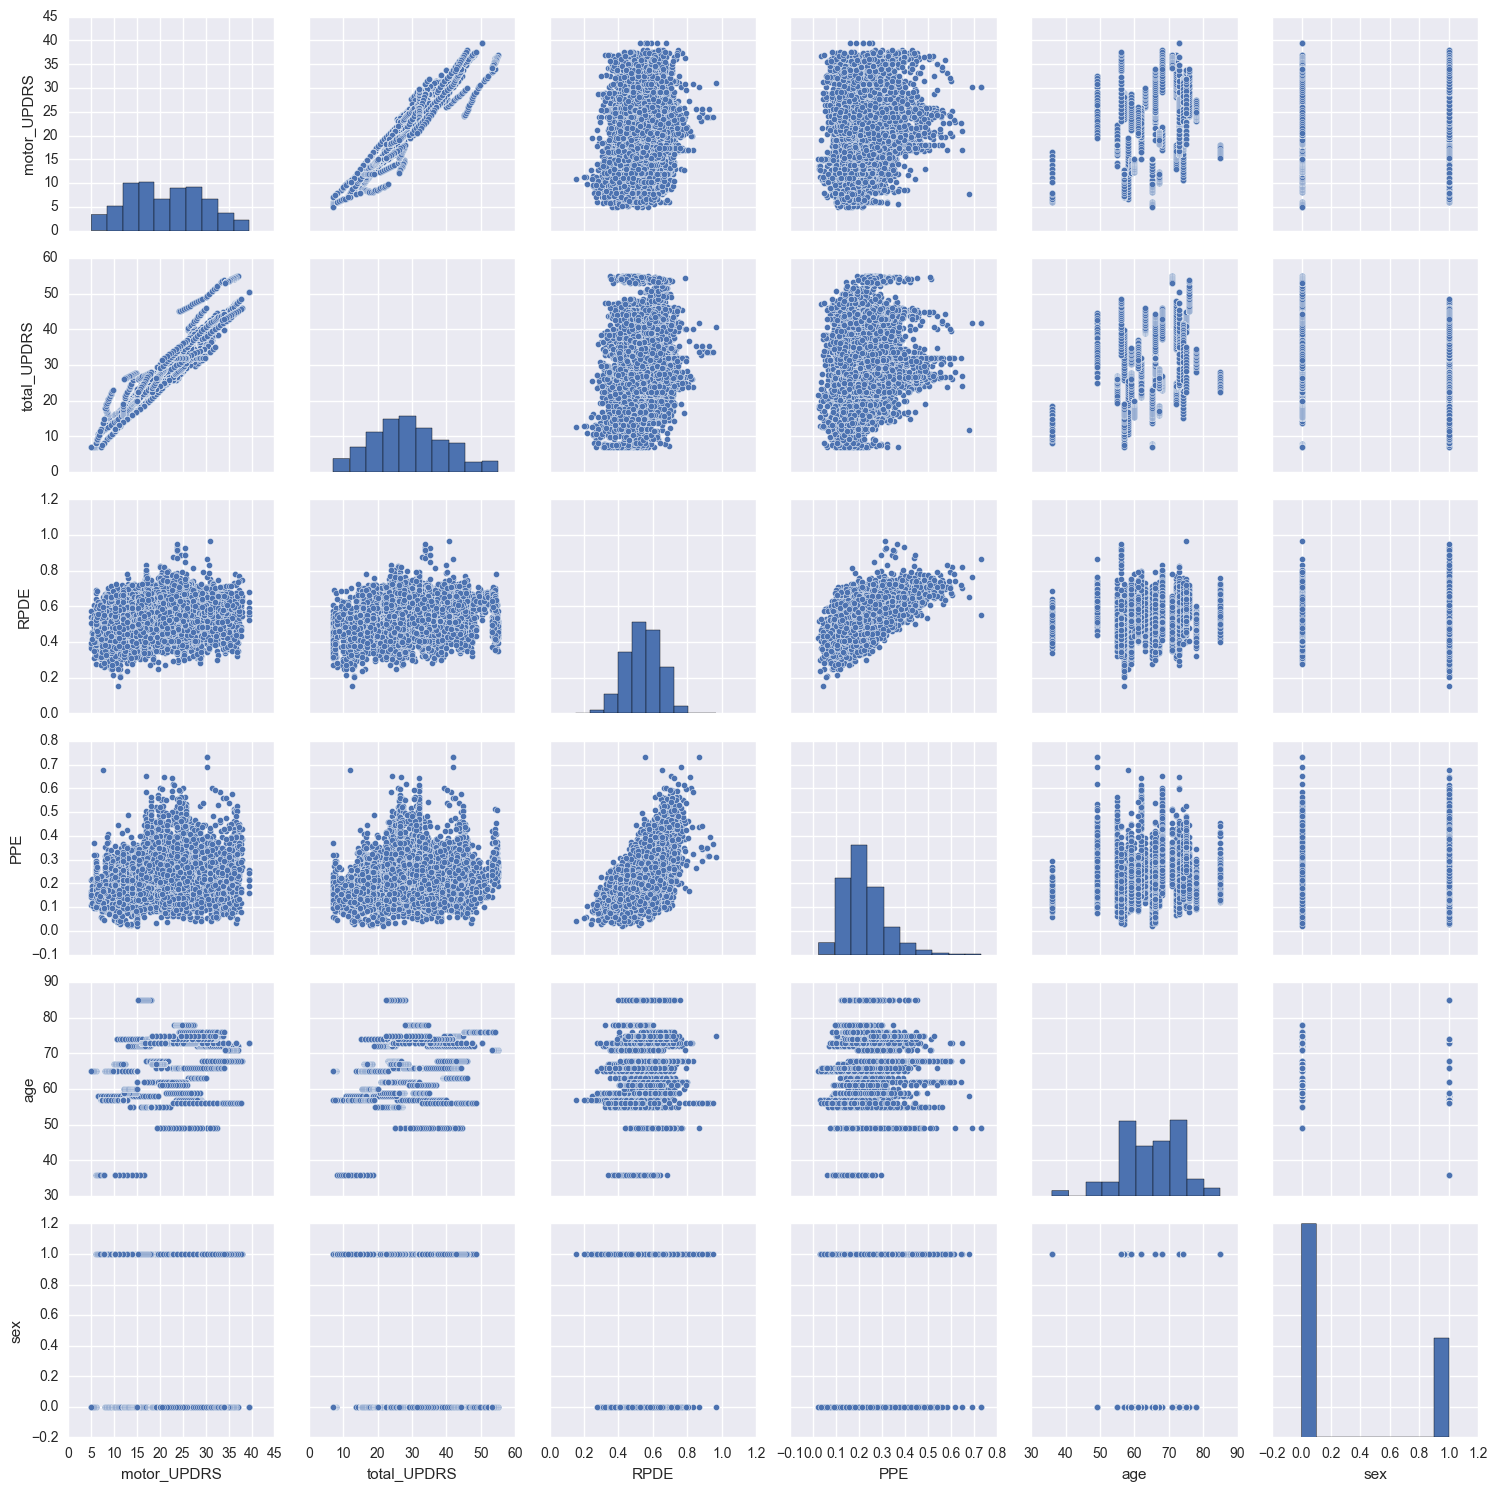

In [22]:
sns.pairplot(df, vars=["motor_UPDRS", "total_UPDRS", "RPDE", "PPE", "age", "sex"])

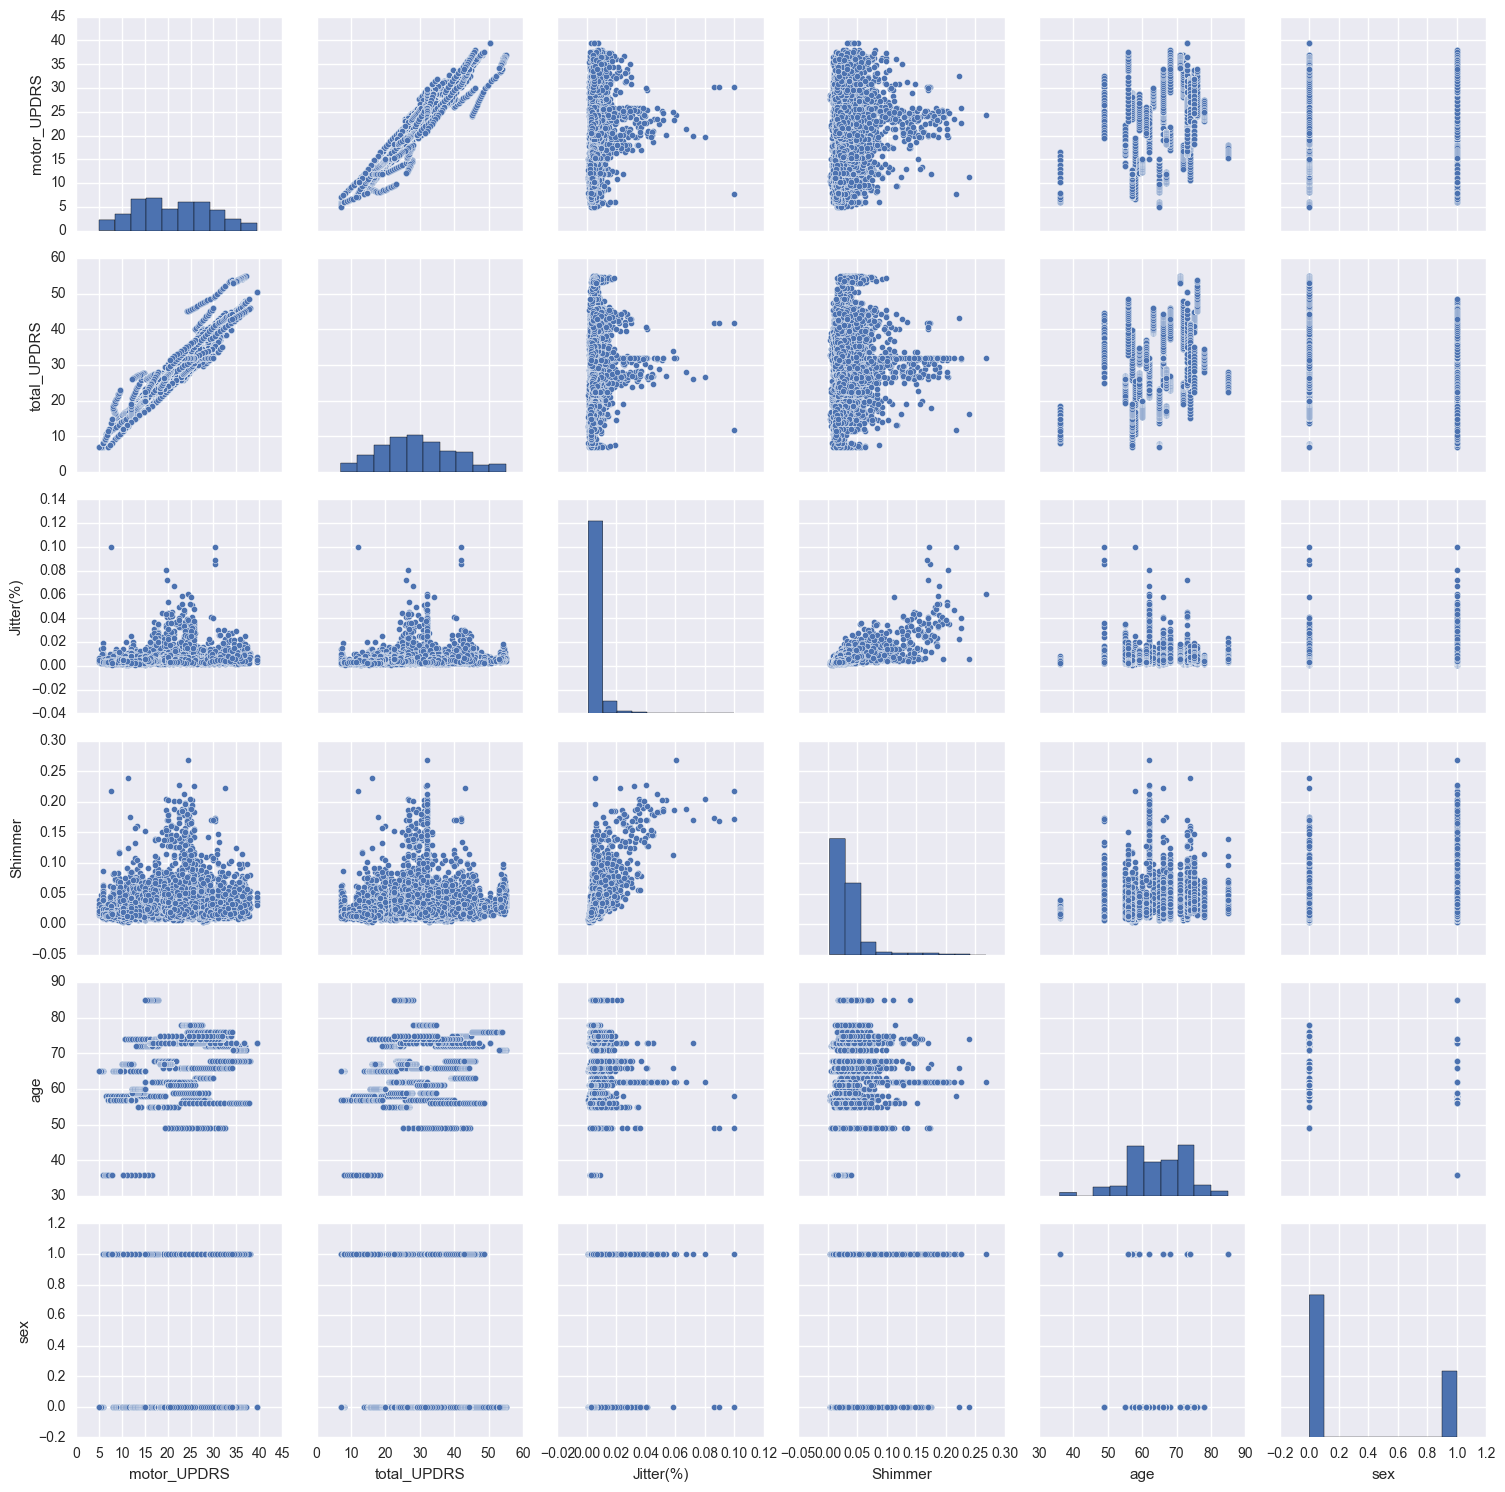

In [21]:
sns.pairplot(df, vars=["motor_UPDRS", "total_UPDRS", "Jitter(%)", "Shimmer", "age", "sex"])

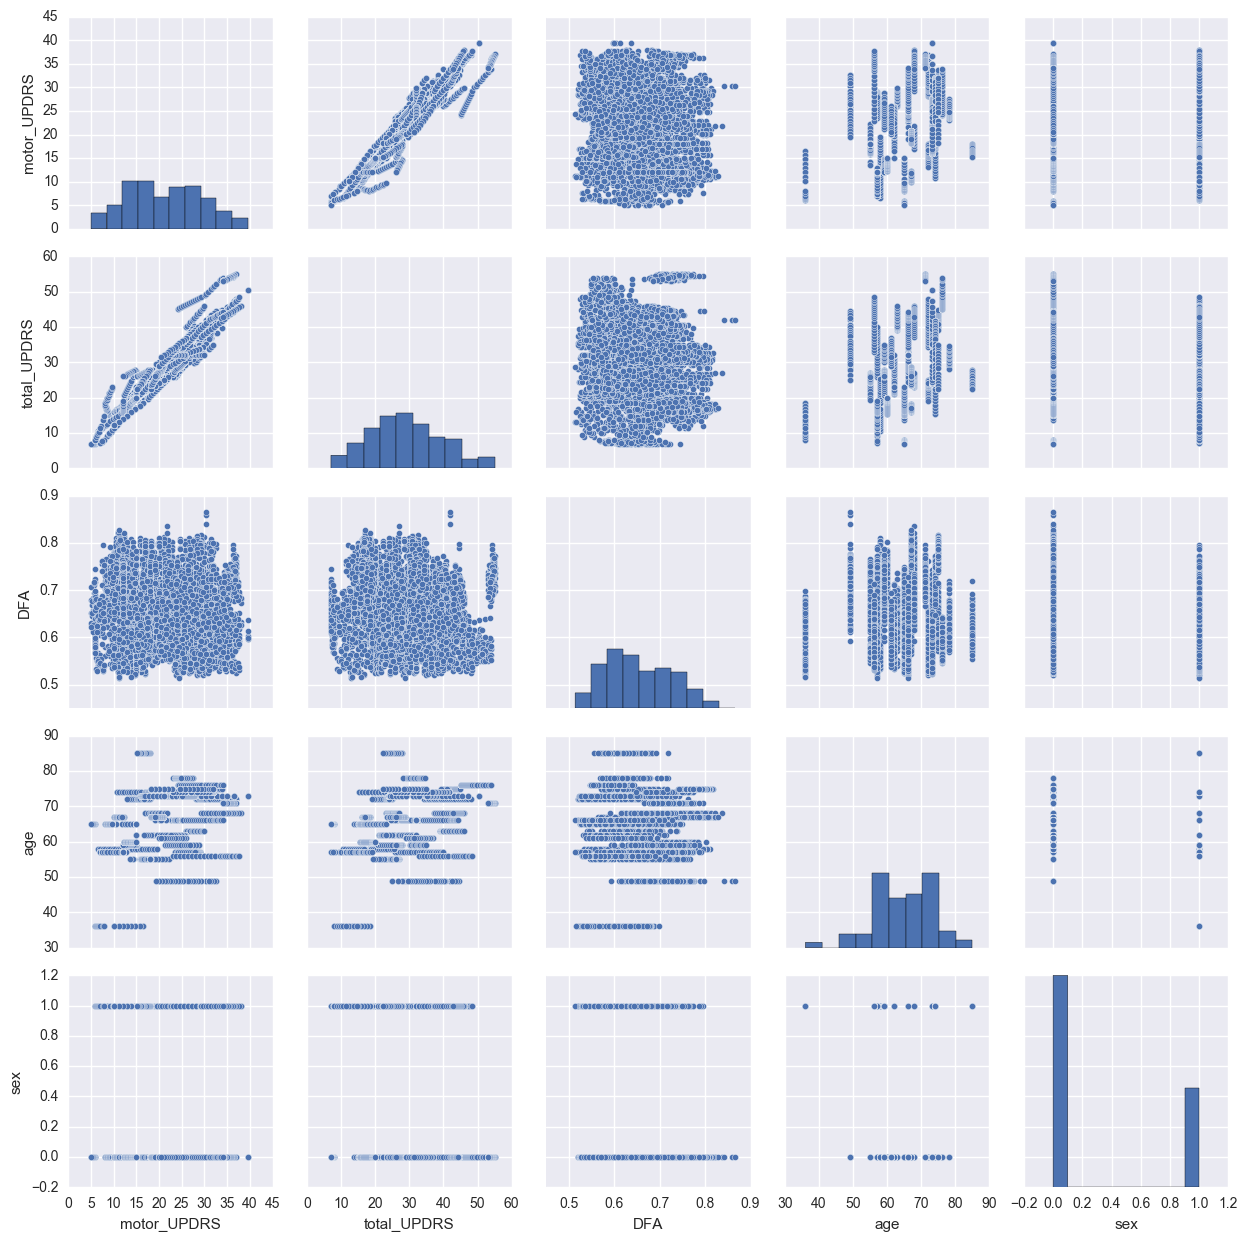

In [20]:
sns.pairplot(df, vars=["motor_UPDRS", "total_UPDRS", "DFA", "age", "sex"])

## Feature Selection

## Prediction

In [ ]:
#TODO: Train-test-validation split
from sklearn.model_selection import KFold

In [40]:
#Select target 
y = df["total_UPDRS"]

In [ ]:
#Select features
X = df.drop(["motor_UPDRS","total_UPDRS"], axis=1)